In [2]:
from sklearn import svm

classifier = svm.SVC()

In [3]:
import numpy as np
import pandas as pd

dataset: https://drive.google.com/drive/folders/1NyR0vskEpEGSqumluxfpE22KkS956r9L?usp=sharing

In [4]:
data_train = pd.read_csv("./train.csv")
data_train = data_train.sample(frac=1)
data_train

,filename,dispersion_entropy,RDE,kelas
648,TNSZ003.mat,2.107550,0.014900,TNSZ
528,FNSZ239.mat,1.152314,0.376651,FNSZ
848,FNSZ062.mat,1.850225,0.061050,FNSZ
26,FNSZ292.mat,2.174881,0.004826,FNSZ
679,GNSZ164.mat,2.150015,0.010577,GNSZ
...,...,...,...,...
144,GNSZ142.mat,1.374193,0.249921,GNSZ
534,TCSZ004.mat,1.662201,0.163513,TCSZ
728,FNSZ501.mat,2.077221,0.024062,FNSZ
603,FNSZ362.mat,1.973209,0.049889,FNSZ


In [5]:
data_test = pd.read_csv('./test.csv')
data_test = data_test.sample(frac=1)
data_test

,filename,dispersion_entropy,RDE,kelas
209,FNSZ635.mat,0.272718,0.778615,FNSZ
525,FNSZ571.mat,2.172198,0.005245,FNSZ
530,FNSZ773.mat,2.053752,0.020498,FNSZ
129,FNSZ724.mat,2.075635,0.016947,FNSZ
529,FNSZ767.mat,2.081864,0.017060,FNSZ
...,...,...,...,...
155,ABSZ026.mat,1.318601,0.230646,ABSZ
146,FNSZ686.mat,1.474817,0.157472,FNSZ
622,CPSZ137.mat,1.759263,0.098682,CPSZ
18,FNSZ537.mat,1.712928,0.097982,FNSZ


In [6]:
data_test['kelas'].value_counts()

FNSZ    410
GNSZ    138
CPSZ     98
ABSZ     14
TCSZ      9
TNSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [7]:
data_test=data_test[data_test.kelas != "ABSZ"]
data_test=data_test[data_test.kelas != "TCSZ"]
data_test=data_test[data_test.kelas != "TNSZ"]
data_test=data_test[data_test.kelas != "SPSZ"]
data_test=data_test[data_test.kelas != "MYSZ"]

for a in range(250):
    if(data_test['kelas'].iloc[a] == "FNSZ"):
        data_test = data_test.drop(data_test.iloc[a].name)


data_test['kelas'].value_counts()

FNSZ    250
GNSZ    138
CPSZ     98
Name: kelas, dtype: int64

In [8]:
data_train['kelas'].value_counts()

FNSZ    521
GNSZ    172
CPSZ    132
ABSZ     14
TCSZ     11
TNSZ      9
SPSZ      5
MYSZ      2
Name: kelas, dtype: int64

In [9]:
data_train=data_train[data_train.kelas != "ABSZ"]
data_train=data_train[data_train.kelas != "TCSZ"]
data_train=data_train[data_train.kelas != "TNSZ"]
data_train=data_train[data_train.kelas != "SPSZ"]
data_train=data_train[data_train.kelas != "MYSZ"]
data_train['kelas'].value_counts()

for a in range(310):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    322
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [10]:
for a in range(200,250):
    if(data_train['kelas'].iloc[a] == "FNSZ"):
        data_train = data_train.drop(data_train.iloc[a].name)


data_train['kelas'].value_counts()

FNSZ    303
GNSZ    172
CPSZ    132
Name: kelas, dtype: int64

In [11]:
data_train = data_train.drop(columns=["filename"])
data_train

,dispersion_entropy,RDE,kelas
848,1.850225,0.061050,FNSZ
679,2.150015,0.010577,GNSZ
152,2.110545,0.014043,FNSZ
261,2.111614,0.018362,GNSZ
143,2.127903,0.014744,GNSZ
...,...,...,...
27,2.178602,0.003845,FNSZ
144,1.374193,0.249921,GNSZ
728,2.077221,0.024062,FNSZ
603,1.973209,0.049889,FNSZ


In [12]:
classes_train = np.array(data_train['kelas'])
data_train = data_train.drop(columns=["kelas"])

In [13]:
data_train

,dispersion_entropy,RDE
848,1.850225,0.061050
679,2.150015,0.010577
152,2.110545,0.014043
261,2.111614,0.018362
143,2.127903,0.014744
...,...,...
27,2.178602,0.003845
144,1.374193,0.249921
728,2.077221,0.024062
603,1.973209,0.049889


In [14]:
classifier.fit(data_train,classes_train)

SVC()

In [15]:
data_test = data_test.drop(columns=["filename"])
classes_test = np.array(data_test['kelas'])
data_test = data_test.drop(columns=["kelas"])

In [16]:
prediksi = classifier.predict(data_test)

In [17]:
data_train.iloc[[3]]

,dispersion_entropy,RDE
261,2.111614,0.018362


In [18]:
classifier.predict(data_train.iloc[[3]])

array(['FNSZ'], dtype=object)

In [19]:
classes_train[3]

'GNSZ'

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes_test,prediksi)
print("Akurasi: ",str(acc))

Akurasi:  0.51440329218107


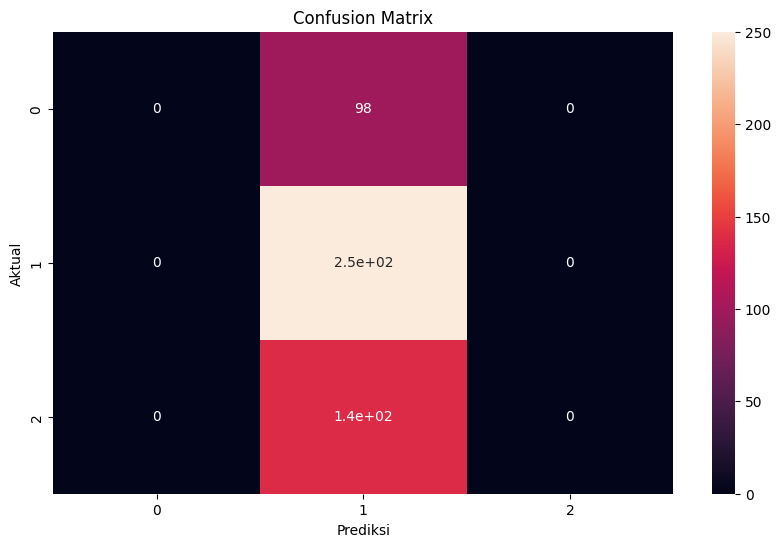

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(classes_test, prediksi)
plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()